In [1]:
## Waste classfication using cnn model

In [5]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\jigya\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\jigya\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [7]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings 
warnings.filterwarnings('ignore')

In [8]:
train_path ="dataset/TRAIN"
test_path ="dataset/TEST"

In [9]:
# Importing Libraries 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from glob import glob

In [10]:
#Visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array= cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 9999/9999 [01:46<00:00, 93.86it/s] 


In [11]:
data.shape

(22564, 2)

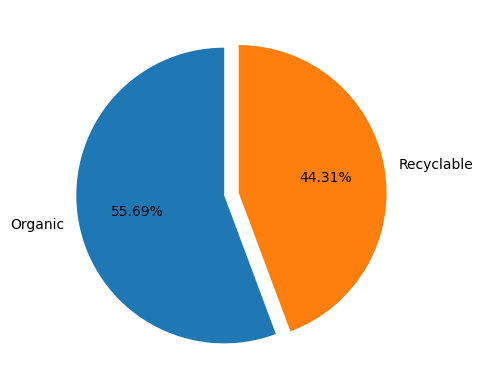

In [12]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels=['Organic','Recyclable'],autopct='%0.2f%%',startangle =90,explode=[0.05,0.05])
plt.show()

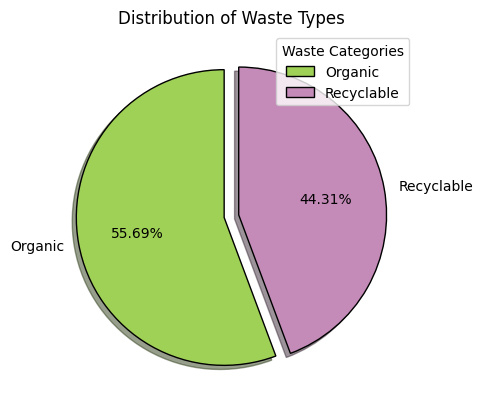

In [13]:
import matplotlib.pyplot as plt

colors = ['#a0d157', '#c48bb8']
explode = [0.05, 0.05]

plt.pie(
    data.label.value_counts(),
    labels=['Organic', 'Recyclable'],
    autopct='%0.2f%%',
    startangle=90,
    explode=explode,
    colors=colors,
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
plt.title("Distribution of Waste Types")
plt.legend(loc="upper right", title="Waste Categories")
plt.show()


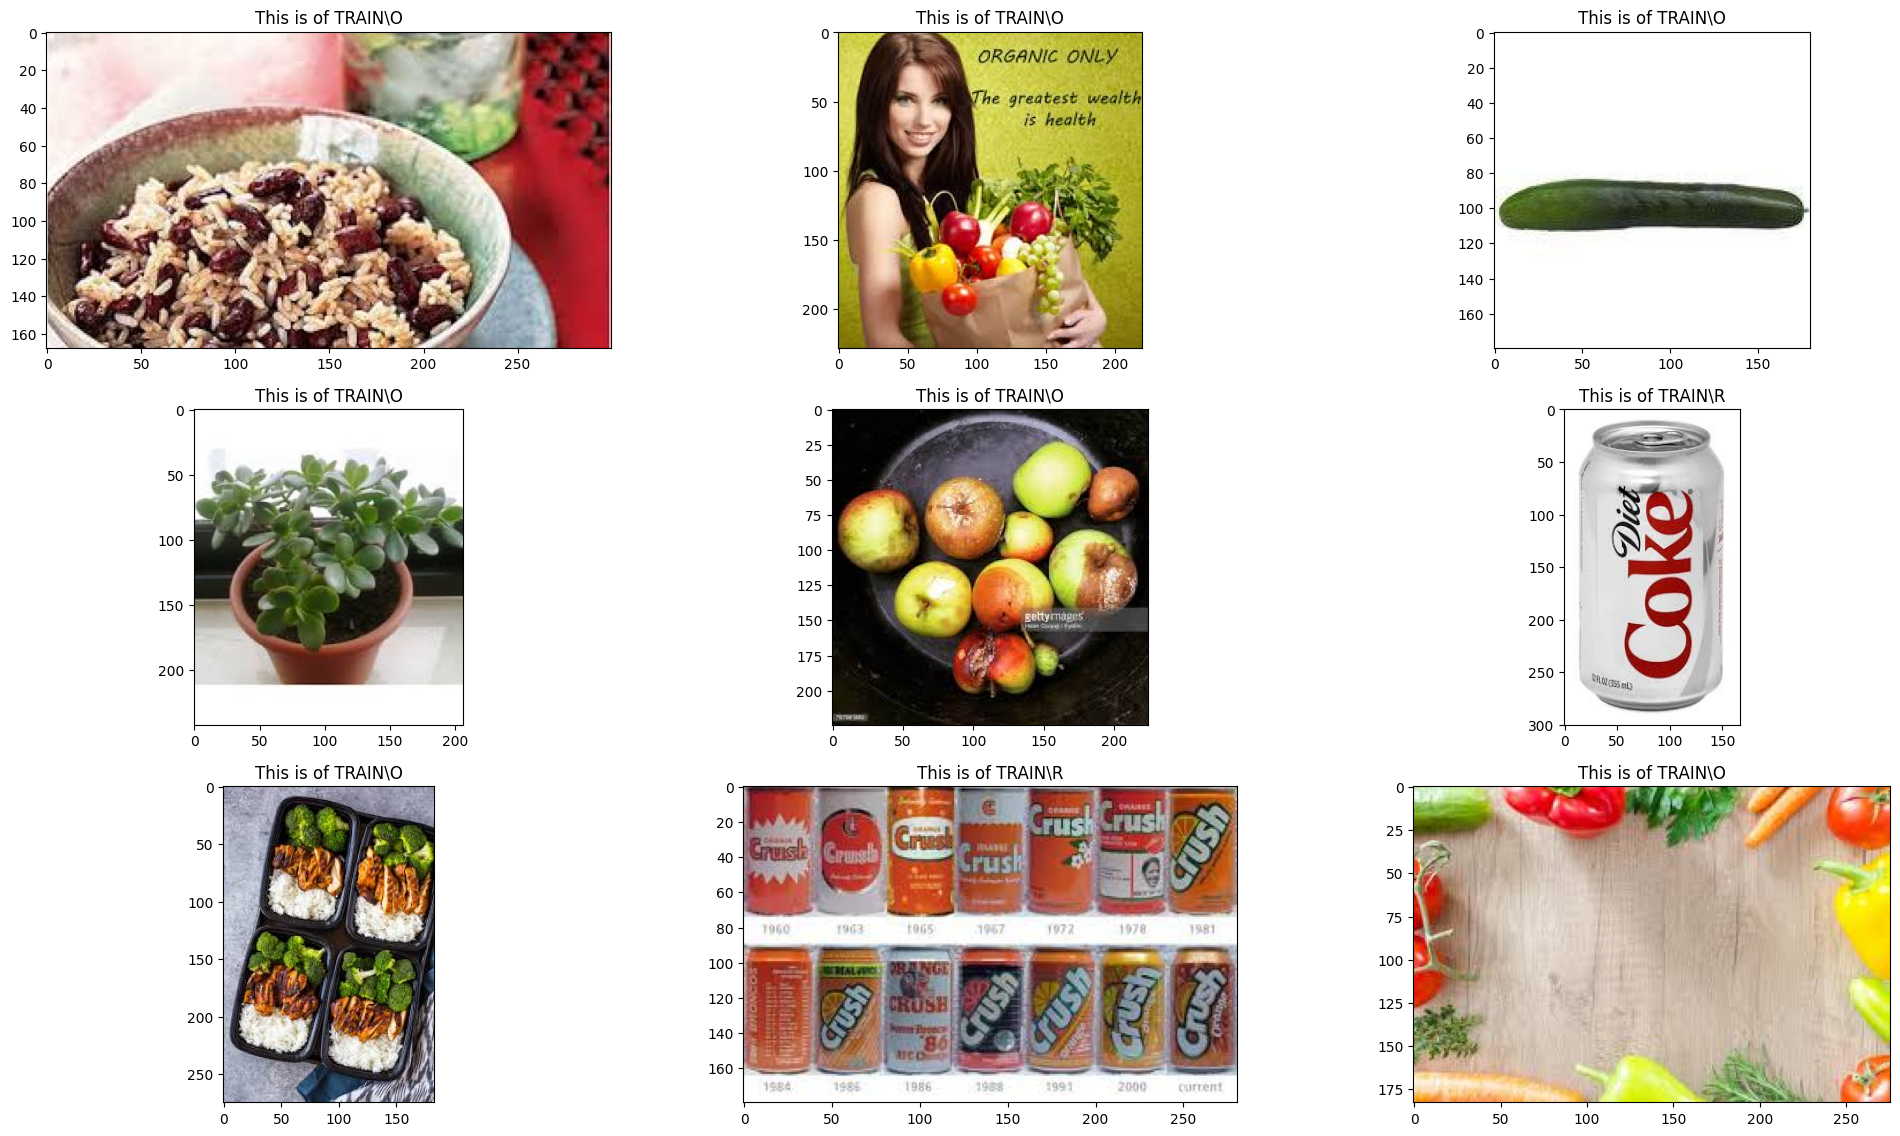

In [14]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index =np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN - Convolutional Neutral Network

In [15]:
model =Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer ="adam",
              metrics = ["accuracy"])
batch_size =256

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
test_datagen =ImageDataGenerator(rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size =(244,244),
    batch_size =batch_size,
    color_mode ="rgb",
    class_mode ="categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size =(244,244),
    batch_size =batch_size,
    color_mode ="rgb",
    class_mode ="categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
hist= model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)